In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization

In [2]:
!pip install opencv-python

In [3]:
train_ds = keras.utils.image_dataset_from_directory(
    directory="C://Users//Veeramalla Venkatsai//OneDrive//Desktop//BharatPe//Task4//train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256))

Found 20000 files belonging to 2 classes.


In [4]:
test_ds = keras.utils.image_dataset_from_directory(
    directory="C://Users//Veeramalla Venkatsai//OneDrive//Desktop//BharatPe//Task4//test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256))

Found 5000 files belonging to 2 classes.


In [5]:
train_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

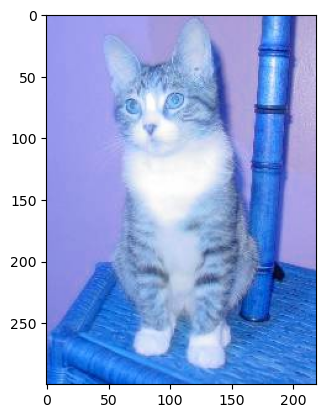

In [6]:
import cv2
train_img = cv2.imread('C://Users//Veeramalla Venkatsai//OneDrive//Desktop//BharatPe//Task4//test//cats//cat.10007.jpg')
plt.imshow(train_img)

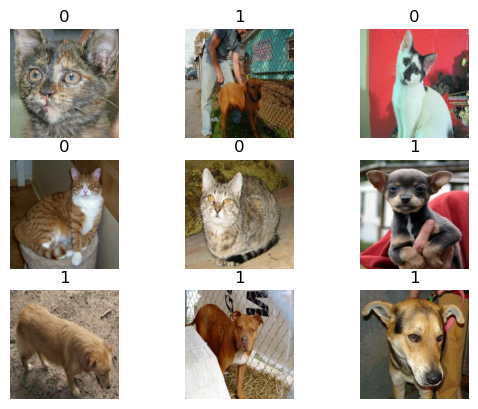

In [7]:
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy()/255.0)
        plt.title(str(labels[i].numpy()))
        plt.axis("off")

In [8]:
def process(image, label):
    image = tf.cast(image/255, tf.float32)
    return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [9]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding="valid", activation="relu", input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [11]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop =EarlyStopping(
    monitor='val_loss',
    start_from_epoch= 0
)
earlystop

In [13]:
history = model.fit(train_ds,epochs =15,validation_data=test_ds)

Epoch 1/15


625/625 [==============================] - 683s 1s/step - loss: 1.3131 - accuracy: 0.6537 - val_loss: 0.8367 - val_accuracy: 0.6472
Epoch 2/15
625/625 [==============================] - 656s 1s/step - loss: 0.6267 - accuracy: 0.7154 - val_loss: 0.6822 - val_accuracy: 0.6816
Epoch 3/15
625/625 [==============================] - 637s 1s/step - loss: 0.4571 - accuracy: 0.7933 - val_loss: 0.7883 - val_accuracy: 0.7446
Epoch 4/15
625/625 [==============================] - 633s 1s/step - loss: 0.3513 - accuracy: 0.8525 - val_loss: 0.7540 - val_accuracy: 0.7030
Epoch 5/15
625/625 [==============================] - 656s 1s/step - loss: 0.2614 - accuracy: 0.8978 - val_loss: 0.7612 - val_accuracy: 0.7476
Epoch 6/15
625/625 [==============================] - 649s 1s/step - loss: 0.1833 - accuracy: 0.9293 - val_loss: 0.8413 - val_accuracy: 0.7524
Epoch 7/15
625/625 [==============================] - 5800s 9s/step - loss: 0.1143 - accuracy: 0.9561 - val_loss: 1.0874 - val_accuracy: 0.7

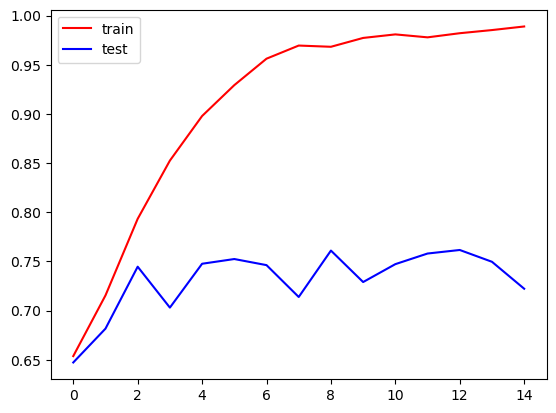

In [14]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()


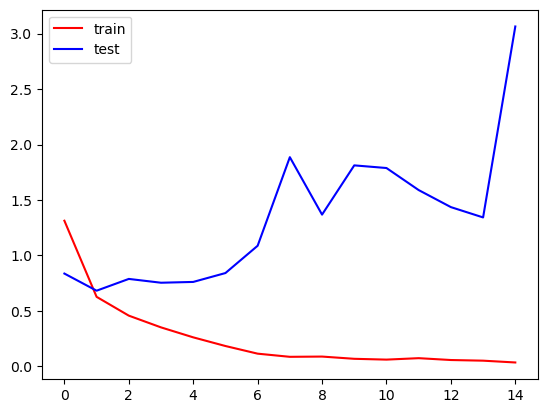

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

In [16]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [18]:
batch_size = 32

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'C://Users//Veeramalla Venkatsai//OneDrive//Desktop//BharatPe//Task4//train',  # this is the target directory
        target_size=(256,256),  # all images will be resized to 256x256
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'C://Users//Veeramalla Venkatsai//OneDrive//Desktop//BharatPe//Task4//test',
        target_size=(256,256),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [19]:
history = model.fit(train_generator,epochs= 5,batch_size = 32,verbose = 1,
                    validation_data=validation_generator)

Epoch 1/5
625/625 [==============================] - 750s 1s/step - loss: 0.5301 - accuracy: 0.7622 - val_loss: 0.5782 - val_accuracy: 0.7432
Epoch 2/5
625/625 [==============================] - 733s 1s/step - loss: 0.4386 - accuracy: 0.8000 - val_loss: 0.4454 - val_accuracy: 0.8032
Epoch 3/5
625/625 [==============================] - 751s 1s/step - loss: 0.4181 - accuracy: 0.8094 - val_loss: 0.4660 - val_accuracy: 0.7840
Epoch 4/5
625/625 [==============================] - 775s 1s/step - loss: 0.3910 - accuracy: 0.8248 - val_loss: 0.5178 - val_accuracy: 0.7926
Epoch 5/5
625/625 [==============================] - 797s 1s/step - loss: 0.3825 - accuracy: 0.8309 - val_loss: 0.3857 - val_accuracy: 0.8326


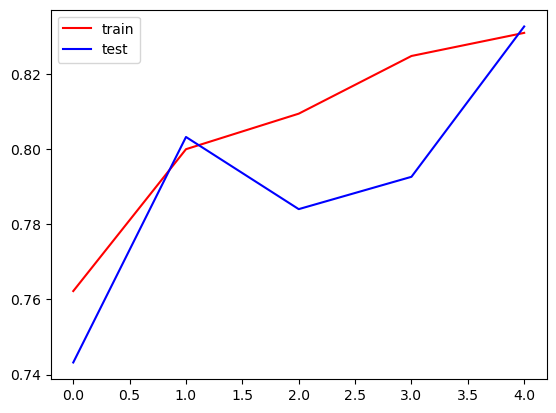

In [20]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

In [21]:
pred = model.predict(validation_generator)
pred

157/157 [==============================] - 36s 226ms/step


array([[0.48127618],
       [0.95432484],
       [0.21266675],
       ...,
       [0.10145853],
       [0.39715466],
       [0.02908072]], dtype=float32)

In [22]:
pred = model.predict(validation_generator)
pred = np.where(pred>0.5,1,0)
pred

157/157 [==============================] - 35s 222ms/step


array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [23]:
import cv2

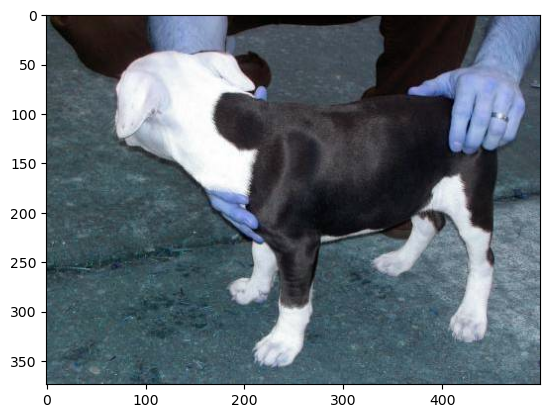

In [28]:
test_img = cv2.imread('C://Users//Veeramalla Venkatsai//OneDrive//Desktop//BharatPe//Task4//test//dogs//dog.10022.jpg')
plt.imshow(test_img)


In [29]:
test_img.shape

(374, 500, 3)

In [30]:
test_img = cv2.resize(test_img,(256,256))

In [31]:
test_img.shape

(256, 256, 3)

In [32]:
test_input = test_img.reshape((1,256,256,3))

In [33]:
model.predict(test_input)

1/1 [==============================] - 0s 126ms/step


array([[1.8708277e-15]], dtype=float32)